In [1]:
import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns


ModuleNotFoundError: No module named 'PatcherBot'

### Load params from .mat file

In [ ]:
# sumPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/processed'
# imgPath = '/Volumes/genie/BenArthur/patch-screen/bot'
# rawPath = '/Users/zhengj10/Desktop/'
rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_dead_sensor'
os.path.exists(rawPath)


In [3]:
# datePath = pb.getPathInfo(rawPath)
datePath = ['2020.02.12_000']
datePath


['2020.02.12_000']

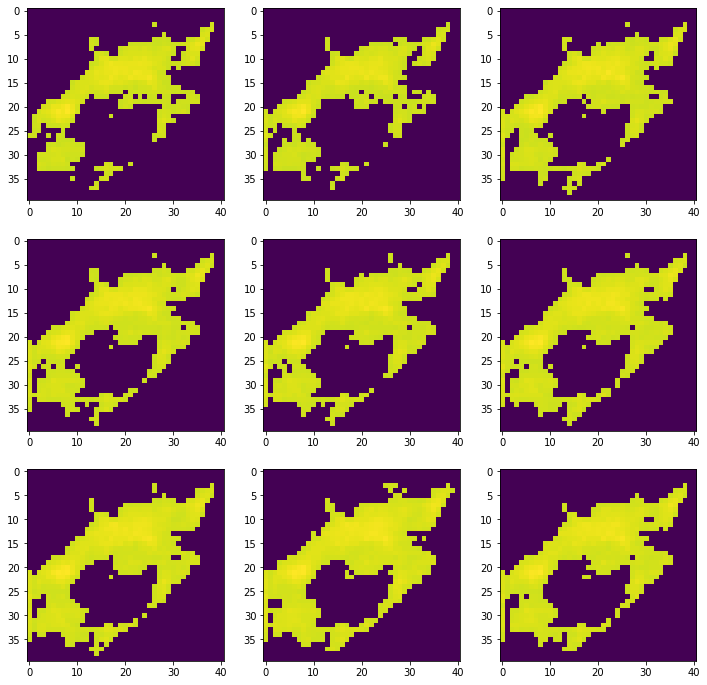

In [11]:
plate = 'plate_001'
cell = 'patch_attempt_0014_000'
i = 1
dff_list = []
fig = plt.figure(figsize=[12,12])
for trial in range(9):
    dataFile = os.path.join(rawPath,datePath[0],plate,cell,'camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')
    
    data = h5py.File(dataFile,'r')
    trace = data['data'][()]
    ref = np.mean(trace[10:60,:,:],axis=0)
    fb = np.min(ref)
    crop = ref[234:274,:]
    max_val = np.max(crop)
    act_pix = crop > (fb + (max_val-fb)*0.67)
    f0 = np.sum(act_pix * crop) / np.sum(act_pix)
    dff = []

    for frame in range(trace.shape[0]):
        dff_single = ((np.sum(trace[frame, 234:274, :]*act_pix)/np.sum(act_pix)) - f0)/(f0-fb)
        dff.append(dff_single)
    dff = np.mean(dff[950:1050])
    dff_list.append(dff)
    ax = plt.subplot(3,3,i)
    ax.imshow(act_pix * crop)
    i+=1
    
plt.show()


In [ ]:
plt.plot(dff_list)
plt.show
